In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import os
import math


In [2]:
file = r'D:\UNI\MILJOETEK\4. semester\Calculations - Copy\LCIA FU_.xlsx'
file_end = r'D:\UNI\MILJOETEK\4. semester\Calculations - Copy\LCIA FU endpoint.xlsx'
sheet = 'Totals'
sheet2 = 'Norm + Weigh'
save_dir = r'D:\UNI\MILJOETEK\4. semester\Calculations - Copy\FU'
# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)
data = pd.read_excel(file, sheet_name=sheet)
data_end = pd.read_excel(file_end, sheet_name=sheet)
data_NW = pd.read_excel(file, sheet_name=sheet2)
data

,Index,AAE,GWP,ETFW,ADPf,EPf,EPm,Ept,HTc,HTnc,IR,LU,ADPm,ODP,PMF,POF,WU
0,CDU,0.058692,47.969372,21.106838,60.532418,0.001328,0.006466,0.041310,2.932451e-09,5.373336e-08,0.573665,69.481512,0.000089,2.061376e-07,1.332144e-07,0.013173,5.057824
1,MDU,0.107504,48.141206,24.405804,63.424599,0.001538,0.006412,0.039384,3.281280e-09,4.412589e-08,0.603161,52.149623,0.000129,2.174481e-07,1.664635e-07,0.016280,5.126953
2,No DU,0.014218,231.750806,19.092570,57.853055,0.001210,0.006137,0.036794,2.435061e-09,5.916906e-08,0.549790,38.559534,0.000062,1.977370e-07,8.473273e-08,0.009286,4.979396


In [4]:
df_cols = data.columns
df_cols = df_cols.to_list()
df_cols1 = df_cols[1:]
df_cols2 = df_cols[0]

df_norm = pd.DataFrame().reindex_like(data) #https://stackoverflow.com/questions/23195250/create-empty-dataframe-with-same-dimensions-as-another
for i in df_cols1:
    scaling_factor = max(data[i])
    for j in range(len(data['Index'])):
        df_norm[i][j] =data[i][j]/scaling_factor

for j in range(len(data['Index'])):
    df_norm['Index'][j] = data['Index'][j]


# Selecting the columns from 1th column onwards
columns_to_plot = df_norm.columns[1:]

C:\Users\ruw\AppData\Local\Temp\7\ipykernel_91192\2053714252.py:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_norm[i][j] =data[i][j]/scaling_factor
C:\Users\ruw\AppData\Local\Temp\7\ipykernel_91192\2053714252.py:13: FutureWarning: Cha

In [5]:
cmap = plt.get_cmap('tab20b')
colors = [cmap(i) for i in np.linspace(0, 1, 20)]

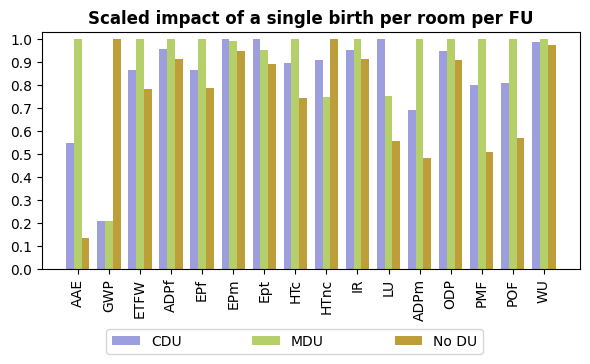

In [32]:


# Plotting
fig, ax = plt.subplots(figsize=(6, 4))

num_processes = len(df_norm)
bar_width = 0.25 
index = np.arange(len(columns_to_plot))

count = 3

# Plotting each group of bars
for i, process in enumerate(df_norm.index):
    values = df_norm.loc[process, columns_to_plot].values
    ax.bar(index + i * bar_width, values, bar_width, label=process, color=colors[count])
    count += 3
    

# Setting labels and title
ax.set_title('Scaled impact of a single birth per room per FU',weight='bold')
ax.set_xticks(index + bar_width )
ax.set_xticklabels(columns_to_plot)
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 1.01, step=0.1))
plt.ylim(0,1.03)

ax.legend(df_norm['Index'], bbox_to_anchor=(0.12, -0.36, 0.7, 0.2), loc="lower left",
            mode="expand", borderaxespad=0,  ncol=3)
plt.tight_layout()
#plt.savefig(os.path.join(save_dir, 'FU_res.jpg'), bbox_inches='tight')
plt.show()

In [29]:

# Define the acronyms and their meanings
acronyms = ["AF", "GWP", "ETCFW", "ERNR", "EPFW", "EPM", "EPT", "HTC", "HTNC", "IRHH", "LU", "MRMM", "ODP", "PMF", "POFHH", "WU"]
meanings = ["Acidification", "Climate change", "Ecotoxicity: freshwater", "Energy resources: non-renewable", 
            "Eutrophication: freshwater", "Eutrophication: marine", "Eutrophication: terrestrial", 
            "Human toxicity: carcinogenic", "Human toxicity: non-carcinogenic", "Ionising radiation: human health", 
            "Land use", "Material resources: metals/minerals", "Ozone depletion", "Particulate matter formation", 
            "Photochemical oxidant formation: human health", "Water use"]

# Create a DataFrame
df = pd.DataFrame({
    "Acronym": acronyms,
    "Explanation": meanings
})

# Display the table
df.head(17)

,Acronym,Explanation
0,AF,Acidification
1,GWP,Climate change
2,ETCFW,Ecotoxicity: freshwater
3,ERNR,Energy resources: non-renewable
4,EPFW,Eutrophication: freshwater
5,EPM,Eutrophication: marine
6,EPT,Eutrophication: terrestrial
7,HTC,Human toxicity: carcinogenic
8,HTNC,Human toxicity: non-carcinogenic
9,IRHH,Ionising radiation: human health


In [9]:
norm_lst = data_NW['Normalization']
weigh_lst = data_NW['Weighting'].to_list
print(len(data_NW['Normalization']))

norm_lst = [0]*(len(data_NW['Normalization']))
weigh_lst = [0]*(len(data_NW['Weighting']))

for i in range(len(data_NW['Normalization'])):
    norm_lst[i] = data_NW['Normalization'][i]
    weigh_lst[i] = data_NW['Weighting'][i]



16


In [10]:
norm_df = pd.DataFrame().reindex_like(data) #https://stackoverflow.com/questions/23195250/create-empty-dataframe-with-same-dimensions-as-another
weigh_df = pd.DataFrame().reindex_like(data)

counter = 0
for i in df_cols1:
    for j in range(len(data['Index'])):
        norm_df[i][j] =data[i][j] * norm_lst[counter]
        weigh_df[i][j] =norm_df[i][j] * weigh_lst[counter]
        #print(i, norm_df[i][j], weigh_df[i][j])
    counter +=1

lst = [0] * len(weigh_df['Index'])
for j in range(len(weigh_df['Index'])):
    for i in df_cols1:
        lst[j] += weigh_df[i][j]
        #print(i,j)



C:\Users\ruw\AppData\Local\Temp\7\ipykernel_91192\3670655309.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  norm_df[i][j] =data[i][j] * norm_lst[counter]
C:\Users\ruw\AppData\Local\Temp\7\ipykernel_91192\3670655309.py:8: FutureWarning: 

In [11]:
lst_scaled = [0] * len(lst)
lst_max = max(lst)


for n in range(len(lst)):
    lst_scaled[n] = lst[n]/lst_max

lst_scaled

[0.2565983960154203, 0.274605311438, 1.0]

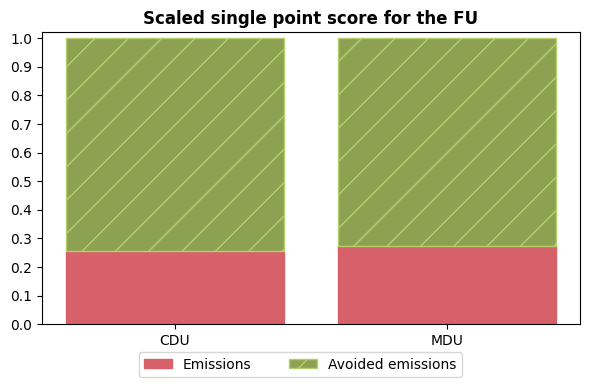

In [31]:
# Calculate bottom and top parts
bottoms = lst_scaled[:-1]
last_value = lst_scaled[-1]
tops = [last_value - bottom for bottom in bottoms]

# Plotting
fig, ax = plt.subplots(figsize=(6, 4))

# Bar positions
bar_positions = [0, 1]

# Bottom parts (first two values)
ax.bar(bar_positions, bottoms, label='Emissions',color=colors[14], edgecolor=colors[14])

# Top parts (values after subtraction) with hatching
ax.bar(bar_positions, tops, bottom=bottoms, label='Avoided emissions', color=colors[5], edgecolor=colors[6], hatch='/')


# Adding labels and titlecolors[1]
ax.set_xticks(bar_positions)
ax.set_xticklabels([data['Index'][0],data['Index'][1]])

# Setting labels and title
ax.set_title('Scaled single point score for the FU',weight='bold')
plt.yticks(np.arange(0, 1.02, step=0.1))
plt.ylim(0, 1.02)

ax.legend(['Emissions', 'Avoided emissions'], bbox_to_anchor=(0.18, -0.18, 0.6, 0.2), loc="lower left",
            mode="expand", borderaxespad=0,  ncol=2)

# ax.plot(bottoms,'o',color=colors[1])
# Show the plot
plt.tight_layout()
#plt.savefig(os.path.join(save_dir, 'GWP_res.jpg'), bbox_inches='tight')
plt.show()

In [14]:
tops

[0.7434016039845797, 0.725394688562]